In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size= 0.25)
y_train= np.array(y_train).reshape(-1,1)
y_test= np.array(y_test).reshape(-1,1)
print("the shape of train data is {} and train target is {}".format(x_train.shape, y_train.shape))
print("the shape of train data is {} and train target is {}".format(x_test.shape, y_test.shape))

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test= scaler.transform(x_test)

the shape of train data is (379, 13) and train target is (379, 1)
the shape of train data is (127, 13) and train target is (127, 1)


### Gradient descent Algorithm

In [4]:
# implementing Gradient descent algorithm
n_iterations= 100
w0= np.random.rand(13) #generating random number list for 13 columns(vector)
w0=w0.reshape(-1,1)
a1=w0
#print(w0.shape)
b= np.random.rand()#generating random number for b
n=b
b0=[]
for i in range(0,len(x_train)):
    b0.append(b)
b0= np.array(b0)
b0= b0.reshape(-1,1)
r=0.001
c1=b0

for i in range(1, n_iterations):
    pdv= np.dot(-2*(x_train).T, (y_train- np.dot(x_train, w0)-b0))
    pdc= -2*(y_train-np.dot(x_train, w0)-b0)
    pdc=sum(pdc) #summing up constant values
    #print(b0[0.shape)
    w1= w0-r*pdv
    b1= b-r*pdc
    
    w0=w1
    b=b1
    for i in range(0,len(x_train)):
        c=[]    
        c.append(b)
    c= np.array(b)
    b0= c.reshape(-1,1)
    r= r/2
w=w0    
print("the Y intercept is given as: ",b)
print("the weight vectors are given as: ",w.T)

the Y intercept is given as:  [20.22363083]
the weight vectors are given as:  [[-0.61649964  0.69726771 -0.54864252  1.30610152 -0.16662472  3.64208772
   0.03913596 -0.66371629  0.06934515 -0.56459092 -1.62944427  1.09934594
  -3.43304027]]


### Stochastic Gradient Descent Algorithm

In [13]:
#stochastic gradient descent algorithm
k=250#random,any value
pdv1=0
pdc2=0
r=0.001
for i in range(1, n_iterations):
    for j in range(0,k): #Random K values
        pdv1= pdv1+ np.dot(-2*(x_train[j,:].reshape(-1,1)), (y_train[j,:].reshape(-1,1)- np.dot(x_train[j,:].reshape(-1,1).T, w0)-n))
        pdc2= pdc2-2*(y_train[j,:].reshape(-1,1)-np.dot(x_train[j,:].reshape(-1,1).T, w0)-n)
        
    w1= w0-r*pdv1
    b1= n-r*pdc2
    
    w0=w1
    n=b1
    r= r/2
    
    
print("the Y intercept is given as: ",n)
print("the weight vectors are given as: ",w0.T)

the Y intercept is given as:  [[22.6086972]]
the weight vectors are given as:  [[-0.99557639  0.92506317 -0.16391431 -0.08349246 -1.59234037  3.30734195
   0.15121774 -2.02675639  1.02761666 -1.12424326 -2.16221825  0.8963558
  -3.39187639]]


In [14]:
clf = SGDRegressor()
clf.fit(x_train, y_train)
#print(mean_squared_error(Y, clf.predict(X)))
y_pred= clf.predict(x_test)
coefficients= clf.coef_
print(coefficients)

[-0.77616502  0.67968006 -0.16750185  0.87476142 -1.11141537  3.21193882
 -0.0199516  -2.01619696  0.68978477 -0.17731497 -1.74397821  1.01042635
 -3.77416904]


C:\Users\chana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


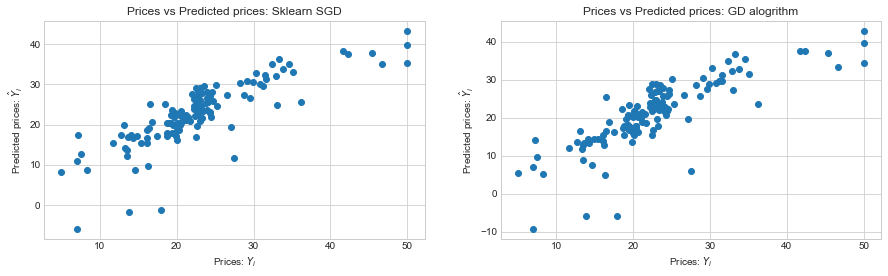

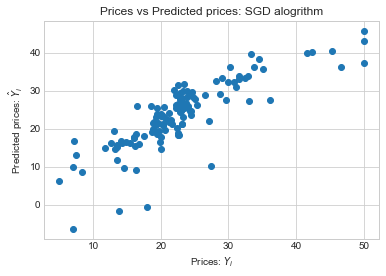

In [15]:
# Scatter plot of test vs predicted
# sklearn SGD
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Sklearn SGD")


y1_pred= np.dot(x_test, w) + b
# Implemented SGD
plt.subplot(122)
plt.scatter(y_test,y1_pred )
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: GD alogrithm")
plt.show()
y2_pred= np.dot(x_test,w0 ) + n

plt.scatter(y_test,y2_pred )
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: SGD alogrithm")
plt.show()



#### Observations
    1. Our algorithms aren't very accurate but they work decently
    2. We applied sklearn algorithm, GD algorithm and SGD algorithm and plotted their graphs
    3. Both the algorithms work significantly well


### PDF Graph for predicted values

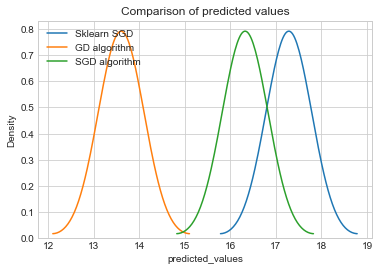

In [16]:
import seaborn as sns
y_pred=np.array(y_pred).reshape(-1,1)
#print(np.array(y1_pred).reshape(-1,1))
sns.set_style('whitegrid')
sns.kdeplot(y_pred[0], label = "Sklearn SGD", bw = 0.5)
sns.kdeplot(y1_pred[0], label = "GD algorithm", bw = 0.5)
sns.kdeplot(y2_pred[0], label = "SGD algorithm", bw = 0.5)
plt.title("Comparison of predicted values")
plt.xlabel("predicted_values")
plt.ylabel("Density")
plt.legend(loc= "upper left")
plt.show()

#### observations
    1. We find that the predicted values are greater for sgd algorithm in comparison to SKlearn
    2. For Gd algorithm, the predicted values are lesser than that of skearln algorithm

### PDF graph for error

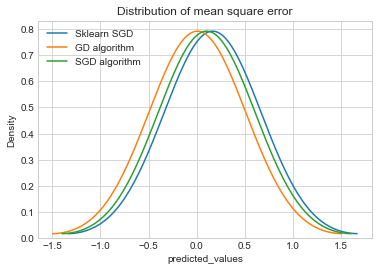

In [17]:
import seaborn as sns
y_pred=np.array(y_pred).reshape(-1,1)
#print(np.array(y1_pred).reshape(-1,1))
sns.set_style('whitegrid')
sns.kdeplot(((y_pred[0]-np.mean(y_test[0]))**2)/len(y_test), label = "Sklearn SGD", bw = 0.5)
sns.kdeplot(((y1_pred[0]-np.mean(y_test[0]))**2)/len(y_test), label = "GD algorithm", bw = 0.5)
sns.kdeplot(((y2_pred[0]-np.mean(y_test[0]))**2)/len(y_test), label = "SGD algorithm", bw = 0.5)
plt.title("Distribution of mean square error")
plt.xlabel("predicted_values")
plt.ylabel("Density")
plt.legend(loc= "upper left")
plt.show()

#### observations
    1. We find that the MSE error is significantly more for GD algorithm than SKlearn algorithm
    2. SGD algorithm has predicted values less compared to GD algorithm

#### MSE/RMSE comparsion

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np
print( "the mean squared error of sklearn SGD is:",np.round(mean_squared_error(y_test, y_pred),3))
print( "the mean squared error of implemented GD algorithm  is:",np.round(mean_squared_error(y_test, y1_pred),3))
print( "the mean squared error of implemented SGD algorithm is:",np.round(mean_squared_error(y_test, y2_pred),3))
print("="*50)
print( "the root mean squared error of sklearn SGD is:",np.round(sqrt(mean_squared_error(y_test, y_pred)),3))
print( "the root mean squared error of implemented GD algorithm  is:",np.round(sqrt(mean_squared_error(y_test, y1_pred)),3))
print( "the root mean squared error of implemented SGD algorithm is:",np.round(sqrt(mean_squared_error(y_test, y2_pred)),3))

the mean squared error of sklearn SGD is: 22.981
the mean squared error of implemented GD algorithm  is: 29.163
the mean squared error of implemented SGD algorithm is: 24.625
the root mean squared error of sklearn SGD is: 4.794
the root mean squared error of implemented GD algorithm  is: 5.4
the root mean squared error of implemented SGD algorithm is: 4.962


### Conclusion
    1. We've successfully implemented SGD and GD algorithm for Boston dataset
    2. We've chosen our r value as 0.001
    3. Both the alogorithms work well for boston dataset. We may test it on other datasets as well. 
    4. r value has to be carefully chosen in order to obtain accurate values 